In [57]:
import pandas as pd
import glob

# a = pd.read_csv('./data/coin_Bitcoin.csv')
# a

csv_files = glob.glob('./data/coin_*.csv')
dfs = [pd.read_csv(f) for f in csv_files]
all_coins = pd.concat(dfs, ignore_index=True)
all_coins = pd.DataFrame(all_coins)
all_coins[['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']] = all_coins[['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']].astype(float)
binance_coin_df = all_coins[all_coins['Name'].str.lower().str.contains('binance')]
binance_coin_df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
275,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,2.003950e+05,1.051380e+07
276,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,3.444990e+05,1.077370e+07
277,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,3.425680e+05,1.040670e+07
278,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,3.402180e+05,1.078110e+07
279,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,2.242610e+05,1.064140e+07
...,...,...,...,...,...,...,...,...,...,...
1712,1438,Binance Coin,BNB,2021-07-02 23:59:59,290.621683,277.350302,287.754456,287.423094,1.133633e+09,4.410016e+10
1713,1439,Binance Coin,BNB,2021-07-03 23:59:59,302.605867,283.434010,287.215592,298.237117,1.113777e+09,4.575938e+10
1714,1440,Binance Coin,BNB,2021-07-04 23:59:59,314.713019,292.787370,298.113557,307.732096,1.387396e+09,4.721623e+10
1715,1441,Binance Coin,BNB,2021-07-05 23:59:59,307.684855,293.523465,307.684855,302.377980,1.504870e+09,4.639473e+10


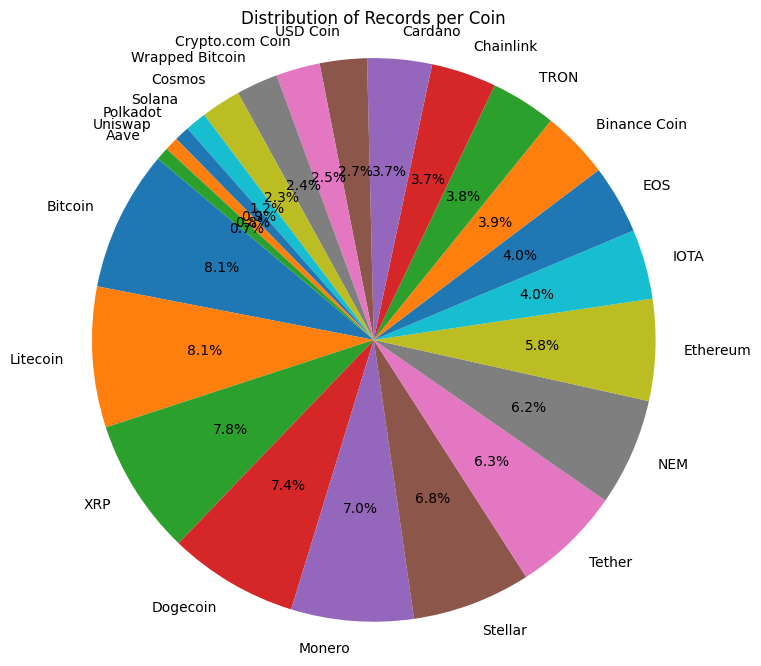

In [25]:
import matplotlib.pyplot as plt

coin_counts = all_coins['Name'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(coin_counts, labels=coin_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Records per Coin')
plt.axis('equal')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
X = all_coins[['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']].values
y = all_coins['Name'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
num_classes = len(le.classes_)

# Build CNN model for classification
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Classification output

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
epochs = 10
batch_size = 32
history = model.fit(
    X_train, y_train_enc,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test_enc)
)

c:\Users\ADMIN\OneDrive\Tài liệu\Vidu\mindx_python\csi\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_16 (Conv1D)              │ (None, 5, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 23)             │         1,495 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,231 (86.84 KB)

 Trainable params: 22,231 (86.84 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
928/928 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1141 - loss: 102962840.0000 - val_accuracy: 0.1049 - val_loss: 1713597.1250
Epoch 2/10
928/928 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0813 - loss: 317325.9062 - val_accuracy: 0.0899 - val_loss: 3.0426
Epoch 3/10
928/928 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0899 - loss: 3.0694 - val_accuracy: 0.0898 - val_loss: 2.9905
Epoch 4/10
928/928 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0912 - loss: 3.0077 - val_accuracy: 0.0898 - val_loss: 2.9594
Epoch 5/10
928/928 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0896 - loss: 2.9888 - val_accuracy: 0.0898 - val_loss: 2.9401
Epoch 6/10
928/928 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0884 - loss: 2.9682 - val_accuracy: 0.0898 - val_loss: 2.9308
Epoch 7/10
928/928 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0892 - loss: 2.9543 - val_accuracy: 0.0898 - val_loss: 2.9280
Epoch 8/10
928/928 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0907 - loss: 2.9412

In [86]:
# Filter test samples for the selected coin
coin_idx = (y_test == 'Binance Coin')  # Replace 'AveCoin' with the desired coin name
X_coin = X_test[coin_idx]

# Predict class probabilities for the selected coin samples
coin_pred_probs = model.predict(X_coin)
coin_pred_classes = coin_pred_probs.argmax(axis=1)
coin_pred_labels = le.inverse_transform(coin_pred_classes)

# Show the corresponding Close prices for the selected coin test samples
coin_close_prices = X_coin[:, 3]
# Convert Close prices to USD format and print
coin_close_prices_usd = ["${:,.2f}".format(price) for price in coin_close_prices]
print(f"Close prices for test samples (USD):", max(coin_close_prices_usd))


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Close prices for test samples (USD): $9.94


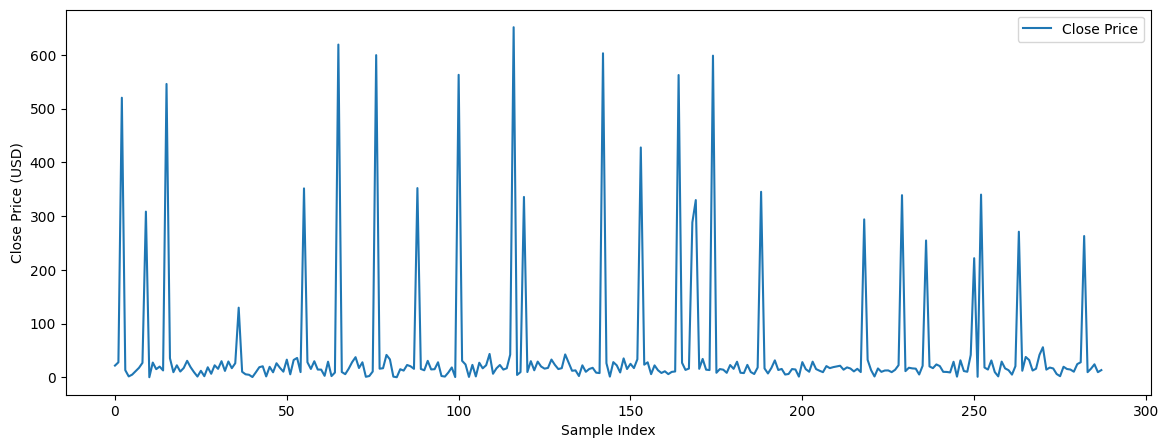

In [87]:
plt.figure(figsize=(14, 5))
plt.plot(coin_close_prices, label='Close Price')
# plt.title(f'{coin_input} Close Prices')
plt.xlabel('Sample Index')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [ ]:
# Nếu bạn có mảng giá dự đoán coin_predicted_close_prices (kiểu float)
import numpy as np
price_diff_pred = np.diff(coin_close_prices)
trend_pred = np.where(price_diff_pred > 0, 1, np.where(price_diff_pred < 0, -1, 0))
num_up_pred = np.sum(trend_pred == 1)
num_down_pred = np.sum(trend_pred == -1)
num_same_pred = np.sum(trend_pred == 0)
# print(f"Số lần dự đoán tăng: {num_up_pred}, giảm: {num_down_pred}, không đổi: {num_same_pred}")
if price_diff_pred[-1] > 0:
    print("tang")
elif price_diff_pred[-1] < 0:
    print("giam")
else:
    print("khong doi")


Số lần dự đoán tăng: 140, giảm: 147, không đổi: 0
tang
